In [ ]:
pip install snscrape


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 KB 1.4 MB/s eta 0:00:00


In [ ]:
pip install locationtagger

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 KB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 30.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=9f606d848a1bc683585acaf9a

In [ ]:
pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

query = "earthquake (help OR stuck) (#earthquake)"
tweets =[]
limit = 500
for tweet in sntwitter.TwitterSearchScraper(query).get_items():

   # print(vars(tweet))
    #break
    if len(tweets) == limit:
      break
    else:
      tweets.append([tweet.date,tweet.user.username,tweet.rawContent, tweet.user.location])
df= pd.DataFrame(tweets,columns=['Date','User','Tweet','Location'])
print(df)
df.to_csv(r'D:\New folder\tweets.csv', sep=',', index=False)
dataf=pd.read_csv(r'D:\New folder\tweets.csv',encoding='latin-1')


                         Date             User  \
0   2023-03-19 19:11:01+00:00        LastQuake   
1   2023-03-19 16:39:13+00:00       unicefturk   
2   2023-03-19 12:45:41+00:00  Benefit_Mankind   
3   2023-03-19 12:32:51+00:00  WorldHelpTsunam   
4   2023-03-19 12:20:31+00:00  theIstChronicle   
..                        ...              ...   
495 2023-02-26 12:57:05+00:00    withfahimkhan   
496 2023-02-26 12:43:00+00:00   EnginEroglu_FW   
497 2023-02-26 12:26:52+00:00  basmehzeitooneh   
498 2023-02-26 11:42:53+00:00             merj   
499 2023-02-26 11:28:46+00:00   bawali_patrkar   

                                                 Tweet  \
0    Help us keep doing what we've always done: inf...   
1    UNICEF is on the ground setting-up #child, #ad...   
2    This #Ramadhan, help us rebuild lives for the ...   
3                                          #earthquake   
4    Major earthquakes shook us and we will help ea...   
..                                                 

In [ ]:
dataf.head()

,Date,User,Tweet,Location
0,2023-03-19 19:11:01+00:00,LastQuake,Help us keep doing what we've always done: inf...,"based in Paris, works globally"
1,2023-03-19 16:39:13+00:00,unicefturk,"UNICEF is on the ground setting-up #child, #ad...",NaN
2,2023-03-19 12:45:41+00:00,Benefit_Mankind,"This #Ramadhan, help us rebuild lives for the ...",UK
3,2023-03-19 12:32:51+00:00,WorldHelpTsunam,#earthquake,World
4,2023-03-19 12:20:31+00:00,theIstChronicle,Major earthquakes shook us and we will help ea...,NaN


In [ ]:
df.shape

(500, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Date      500 non-null    datetime64[ns, UTC]
 1   User      500 non-null    object             
 2   Tweet     500 non-null    object             
 3   Location  500 non-null    object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 15.8+ KB


No null values in any of the column so going for visualization

In [ ]:
#counts number of charcters in each tweet
def get_charcounts(x):
	s = x.split()
	x = ''.join(s)
	return len(x)
df['char_counts'] = df['Tweet'].apply(lambda x: get_charcounts(x))
print(df['char_counts'])

0      242
1      248
2      185
3       11
4      166
      ... 
495    178
496    234
497    265
498    263
499    146
Name: char_counts, Length: 500, dtype: int64


<ipython-input-9-143cd0dfb27f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['char_counts'])


<Axes: xlabel='char_counts', ylabel='Density'>

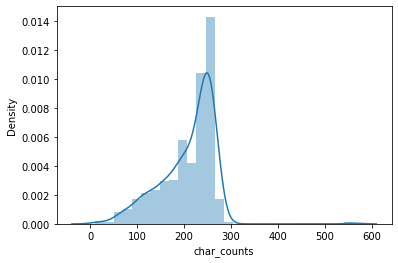

In [ ]:
#plot a graph showing the distribution for the number of characters for tweets
import seaborn as sns
sns.distplot(df['char_counts'])


<ipython-input-10-78add2f2fefd>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['char_counts'], shade= True)


<Axes: xlabel='char_counts', ylabel='Density'>

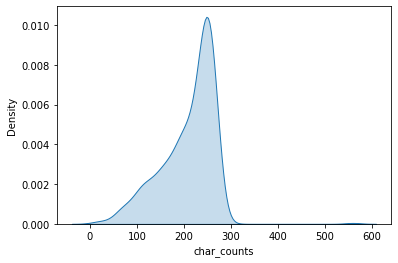

In [ ]:
sns.kdeplot(df['char_counts'], shade= True)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
def _get_stopwords_counts(x):
	l = len([t for t in x.split() if t in stopwords])
	return l
df['stopwords_counts'] = df['Tweet'].apply(lambda x: _get_stopwords_counts(x))
print(df['stopwords_counts'])

0      13
1      13
2       8
3       0
4      11
       ..
495     8
496    19
497    16
498    12
499     7
Name: stopwords_counts, Length: 500, dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<ipython-input-14-65239790400c>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['stopwords_counts'],shade=True)


<Axes: xlabel='stopwords_counts', ylabel='Density'>

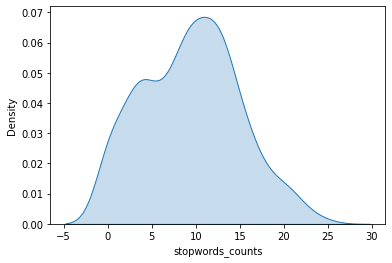

In [ ]:
sns.kdeplot(df['stopwords_counts'],shade=True)

In [ ]:
#Most and Least command words

In [ ]:
import re
str = re.sub(r'[^\w]',' ',df.Tweet[1] ).replace("_"," ")
print(str)

UNICEF is on the ground setting up  child   adolescent and  family support hubs to reach around 500 000 people in the  earthquake affected areas   The needs are still huge and your  support is vital    Help support our efforts by donating now    https   t co rtZDEnYOXS https   t co a1WApEDLbB


In [ ]:
#getting frequency of each words occured in all the Tweets in decreasing order
wordfreq={}
def get_word_freq(text):
  words = text.split()
  wfreq=[words.count(w) for w in words]
  for word in words:
    if word not in wordfreq:
          wordfreq[word] = 0 
    wordfreq[word] += 1

for i in range(0,100):
  get_word_freq(df.iloc[i]['Tweet'])
print(wordfreq)
wordfreq= sorted(wordfreq.items(), key=lambda x:x[1],reverse=True)
print(wordfreq)

{'Help': 13, 'us': 16, 'keep': 5, 'doing': 4, 'what': 4, "we've": 4, 'always': 4, 'done:': 4, 'inform': 4, 'and': 80, 'reassure': 4, 'citizens': 4, 'living': 5, 'in': 61, '#earthquake-prone': 4, 'regions': 5, 'stand': 5, 'side-by-side': 4, 'with': 14, 'affected': 14, 'population': 4, 'case': 5, 'of': 42, 'an': 14, '#earthquake🙏': 4, 'If': 8, 'you': 21, 'can,': 8, 'consider': 8, 'a': 40, 'donation': 8, 'to': 77, 'https://t.co/6Cc7sj0zpP': 8, 'Thank': 9, 'you💟': 4, 'https://t.co/HYs89Kcupv': 1, 'UNICEF': 1, 'is': 20, 'on': 10, 'the': 71, 'ground': 1, 'setting-up': 1, '#child,': 1, '#adolescent': 1, '#family': 1, 'support': 12, 'hubs': 1, 'reach': 2, 'around': 4, '500.000': 1, 'people': 10, '#earthquake': 77, 'areas.': 1, 'The': 5, 'needs': 3, 'are': 13, 'still': 2, 'huge': 2, 'your': 18, '#support': 1, 'vital.': 1, 'our': 12, 'efforts': 4, 'by': 19, 'donating': 3, 'now.': 2, 'https://t.co/rtZDEnYOXS': 2, 'https://t.co/a1WApEDLbB': 1, 'This': 5, '#Ramadhan,': 1, 'help': 66, 'rebuild': 2, 

In [ ]:
print(type(wordfreq))

<class 'list'>


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

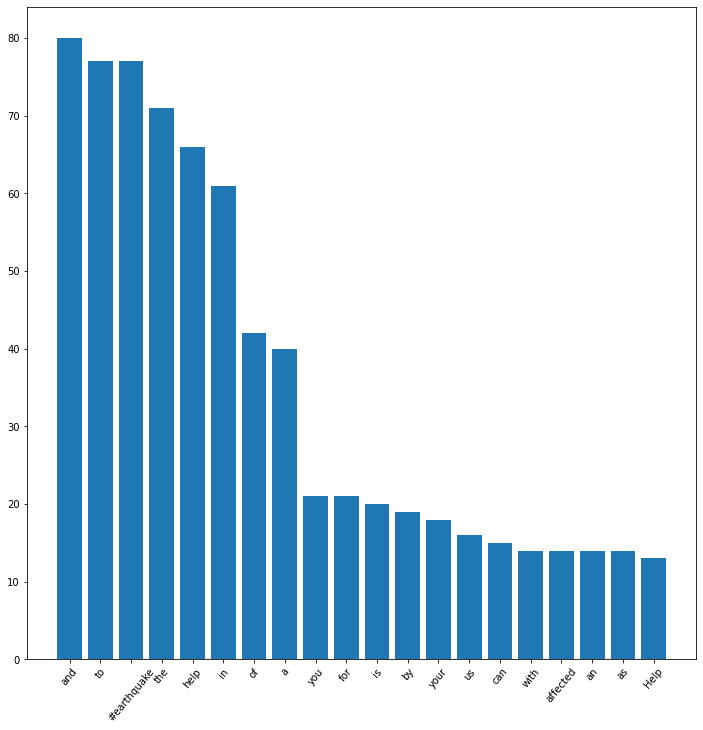

In [ ]:
#bar plot for 20 most common words
words=[]
wordfreqs=[]
for i in range(0,20):
  words.append(wordfreq[i][0])
  wordfreqs.append(wordfreq[i][1])
plt.figure(figsize=(12,12))
plt.bar(words, wordfreqs)
plt.xticks(rotation=50)
plt.show()

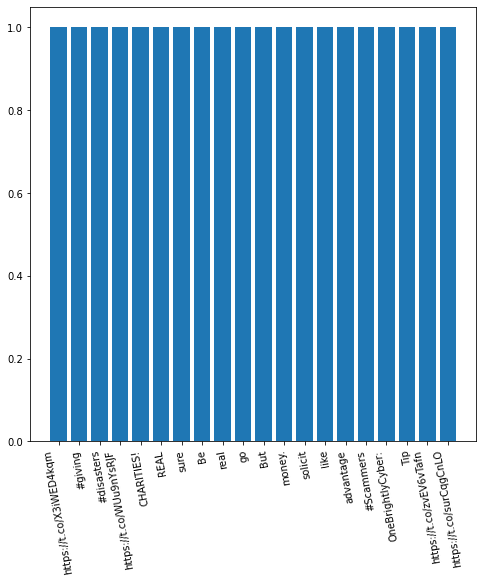

In [ ]:
#bar plot for 20 most common words
words=[]
wordfreqs=[]
for i in range(len(wordfreq)-1,len(wordfreq)-21,-1):
  words.append(wordfreq[i][0])
  wordfreqs.append(wordfreq[i][1])
plt.figure(figsize=(8,8))
plt.bar(words, wordfreqs)
plt.xticks(rotation=100)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_ngram(df, col, ngram_range):
	vectorizer = CountVectorizer(ngram_range=(ngram_range, ngram_range))
	vectorizer.fit_transform(df[col])
	ngram = vectorizer.vocabulary_
	ngram = sorted(ngram.items(), key = lambda x: x[1], reverse=True)

	return ngram
bigram = get_ngram(df,'Tweet', ngram_range=2)

In [ ]:
bigram[:20]

[('휠라 https', 9362),
 ('튀르키예 시리아', 9361),
 ('시리아 휠라', 9360),
 ('ষত রস', 9359),
 ('রস তদ', 9358),
 ('রস উসম', 9357),
 ('রয কম', 9356),
 ('রদ ভদ', 9355),
 ('ভদ কন', 9354),
 ('তদ earthquake', 9353),
 ('কম ষত', 9352),
 ('কন ইন', 9351),
 ('উসম রদ', 9350),
 ('ইন আশ', 9349),
 ('আশ রয', 9348),
 ('सम धनर', 9347),
 ('वत rest', 9346),
 ('रत खबर', 9345),
 ('रत अम', 9344),
 ('मदद रत', 9343)]

In [ ]:
#storing all the tweet as a single string
words=""
for i in range(0,len(wordfreq)):
  words+=wordfreq[i][0]
words

'andto#earthquakethehelpinofayouforisbyyouruscanwithaffectedanasHelparesupportourwillthisonpeoplethatwePleasenothaveThank#Turkey#Earthquake|Ifcan,considerdonationhttps://t.co/6Cc7sj0zpPfrom#Syria&amp;donate-waswhobuild.HTReacts#ArunachalPradesh#HyderabadRains#HelicopterCrash#RetailSamvad#CheetahHelicopter#DMGheravBharatpur#BipinRawat#MehboobaMufti#Help_dinesh#IndianArmy#IPL2023afterhis#TurkiyeneededvictimstheirkeeplivingregionsstandcaseTheThisfamiliesatotherthanen@PMOIndiatimemanychildrenIallthoseWeneedYoufreeIn#charitydoingwhatwe\'vealwaysdone:informreassurecitizens#earthquake-proneside-by-sidepopulation#earthquake🙏you💟aroundeffortsrecentwhichovermoreSyriade#earthquakes@narendramodi#IndiaAsurvivorsouthowbeingvisit#TürkiyebeenanyregainthemTakeaction#earthquake-resilientsociety💟We\'reprofitNGOofferingad-freeservices.you🙏emergencyready#sanliurfahasher#help#HBDayCRPaatil#NobelPeacePrizeneedsdonatingliveslostearthquakesearthquakehim💔protectrescuePeoples#earthquakeinturkeypeople\'sits@RTErd

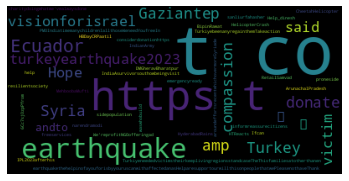

In [ ]:
#printing wordcloud for the tweets
from wordcloud import WordCloud 
word_cloud = WordCloud(max_font_size=80).generate(words)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
import nltk
import spacy
 
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import locationtagger

# initializing sample text

sample_text = df.iloc[58]['Tweet']
 
# extracting entities.
place_entity = locationtagger.find_locations(text = sample_text)
 
# getting all countries
print("The countries in text : ")
print(place_entity.countries)
 
# getting all states
print("The states in text : ")
print(place_entity.regions)
 
# getting all cities
print("The cities in text : ")
print(place_entity.cities)

# getting all country regions
print("The countries regions in text : ")
print(place_entity.country_regions)
 
# getting all country cities
print("The countries cities in text : ")
print(place_entity.country_cities)
 
# getting all other countries
print("All other countries in text : ")
print(place_entity.other_countries)
 
# getting all region cities
print("The region cities in text : ")
print(place_entity.region_cities)
 
# getting all other regions
print("All other regions in text : ")
print(place_entity.other_regions)
 
# getting all other entities
print("All other entities in text : ")
print(place_entity.other)


The countries in text : 
[]
The states in text : 
[]
The cities in text : 
[]
The countries regions in text : 
{}
The countries cities in text : 
{}
All other countries in text : 
[]
The region cities in text : 
{}
All other regions in text : 
[]
All other entities in text : 
['https', 'ShankhaMoGarba', 'ShivangiJoshi', 'hG', 'U L', 'Food', 'CbHPSFhBvh', 'SaveTheWeavers Parliament Rest', 'Peace', 'WHa']


In [ ]:
import locationtagger
import json

# initializing sample text

# extracting entities.
for i in range (0,100):
  place_entity = locationtagger.find_locations(text = df.iloc[i]['Tweet'])
  df.loc[i,'countries']=json.dumps(place_entity.countries)
  df.loc[i,'region']=json.dumps(place_entity.region_cities)
  df.loc[i,'cities']=json.dumps(place_entity.cities)
  df.loc[i,'country_region']=json.dumps(place_entity.country_regions)
  df.loc[i,'country_cities']=json.dumps(place_entity.country_cities)
  df.loc[i,'other_countries']=json.dumps(place_entity.other_countries)
  df.loc[i,'region_cities']=json.dumps(place_entity.region_cities)
  df.loc[i,'other_region']=json.dumps(place_entity.other_regions)
  df.loc[i,'other']=json.dumps(place_entity.other)
 

In [ ]:
df.head()

,Date,User,Tweet,Location,char_counts,stopwords_counts,countries,region,cities,country_region,country_cities,other_countries,region_cities,other_region,other
0,2023-03-19 19:11:01+00:00,LastQuake,Help us keep doing what we've always done: inf...,"based in Paris, works globally",242,13,[],{},[],{},{},[],{},[],"[""Cc sj"", ""https"", ""HYs Kcupv"", ""zpP""]"
1,2023-03-19 16:39:13+00:00,unicefturk,"UNICEF is on the ground setting-up #child, #ad...",,248,13,[],{},[],{},{},[],{},[],"[""UNICEF"", ""https"", ""rtZDEnYOXS https"", ""rtZDE..."
2,2023-03-19 12:45:41+00:00,Benefit_Mankind,"This #Ramadhan, help us rebuild lives for the ...",UK,185,8,[],{},[],{},{},[],{},[],"[""https"", ""JiWvqJCY https"", ""JiWvqJCY"", ""aigFp..."
3,2023-03-19 12:32:51+00:00,WorldHelpTsunam,#earthquake,World,11,0,[],{},[],{},{},[],{},[],[]
4,2023-03-19 12:20:31+00:00,theIstChronicle,Major earthquakes shook us and we will help ea...,,166,11,"[""Turkey""]","{""North Carolina"": [""Turkey""], ""Texas"": [""Turk...","[""Turkey""]",{},"{""United States"": [""Turkey""]}","[""United States""]","{""North Carolina"": [""Turkey""], ""Texas"": [""Turk...","[""North Carolina"", ""Texas""]","[""MMzsjg"", ""Let"", ""NGOs"", ""oQU"", ""NGOs Turkey""]"


In [ ]:
import nltk
named_entities = []
nes = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sample_text)))
for ne in nes:
    if type(ne) is nltk.tree.Tree:
        if (ne.label() == 'GPE' or ne.label() == 'PERSON' or ne.label() == 'ORGANIZATION'):
            l = []
            for i in ne.leaves():
                l.append(i[0])
            s = u' '.join(l)
            if not (s in named_entities):
                named_entities.append(s)

print(named_entities)



['Food', 'ShankhaMoGarba', 'SaveTheWeavers Parliament', 'Peace', 'ShivangiJoshi']


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 77.0 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

nlp = pipeline("ner", model="bert-base-cased")


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

In [ ]:
import spacy
import re
!python3 -m spacy download xx_ent_wiki_sm


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-19 19:16:43.627024: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-19 19:16:43.627164: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-19 19:16:43.627196: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
# Load necessary libraries
import spacy
import re
from geopy.geocoders import Nominatim

# Load pre-trained BERT model and tokenizer
nlp = spacy.load('en_core_web_sm')

# Define example text
text = "I have lived in Delhi united States,Delhi united States, Germany and Berlin,Delhi united States, Connecticut. Also visited Paris, Rome and Mumbai."

# Extract entities using spacy NER
geolocator = Nominatim(user_agent="my_app")
city_country_pairs = {}
doc = nlp(text)
for ent in doc.ents:
    if ent.label_ == 'GPE':
        city = ent.text
        if city in city_country_pairs:
            continue
        try:
            # Get location information of city using geopy
            location = geolocator.geocode(city)
            country = location.raw['display_name'].split(",")[-1].strip()
        except:
            country = 'unknown'
        city_country_pairs[city] = country

# Print extracted city-country pairs
if city_country_pairs:
    print("Cities and their countries:")
    for city, country in city_country_pairs.items():
        print(f"{city}: {country}")
else:
    print("No cities found in text.")


Cities and their countries:
Delhi united States: United States
Germany: Deutschland
Berlin: Deutschland
Connecticut: United States
Paris: France
Rome: Italia
Mumbai: India


In [ ]:
import spacy
from spacy import displacy 
!python3 -m spacy download xx_ent_wiki_sm
!pip install IPython

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-19 19:17:11.850833: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-19 19:17:11.850977: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-19 19:17:11.851001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
dataf=dataf.dropna()


In [ ]:
dataf=dataf.reset_index()
dataf


,index,Date,User,Tweet,Location
0,0,2023-03-19 19:11:01+00:00,LastQuake,Help us keep doing what we've always done: inf...,"based in Paris, works globally"
1,2,2023-03-19 12:45:41+00:00,Benefit_Mankind,"This #Ramadhan, help us rebuild lives for the ...",UK
2,3,2023-03-19 12:32:51+00:00,WorldHelpTsunam,#earthquake,World
3,5,2023-03-19 07:24:10+00:00,msi_press,This Caturday's post shares information from S...,"Hollister, California"
4,6,2023-03-19 03:54:46+00:00,therealishfaq,â¡#ATENCIÃN| AsÃ­ se siento el Terremoto de ...,"Lucknow, India"
...,...,...,...,...,...
395,493,2023-02-26 13:17:53+00:00,BarzaniCF,#BCF quickly responded to the #earthquake that...,Iraq
396,494,2023-02-26 13:11:10+00:00,UNHCRinSYRIA,The #earthquake caused not only material damag...,Syria
397,495,2023-02-26 12:57:05+00:00,withfahimkhan,Emergency Earthquake Relief for Turkey ð¹ð...,Earth
398,497,2023-02-26 12:26:52+00:00,basmehzeitooneh,20 days after the devastating #earthquake disa...,"Beirut, Lebanon"


In [ ]:
j=0
for i in dataf['User']:
  dataf['Tweet'][j]= re.sub(r'[^\w]',' ',dataf['Tweet'][j] ).replace("_"," ")
  dataf['Location'][j]= re.sub(r'[^\w]',' ',dataf['Location'][j]).replace("_"," ")
  j=j+1
dataf.head() 

<ipython-input-41-871a5a5c753b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf['Tweet'][j]= re.sub(r'[^\w]',' ',dataf['Tweet'][j] ).replace("_"," ")
<ipython-input-41-871a5a5c753b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf['Location'][j]= re.sub(r'[^\w]',' ',dataf['Location'][j]).replace("_"," ")


,index,Date,User,Tweet,Location
0,0,2023-03-19 19:11:01+00:00,LastQuake,Help us keep doing what we ve always done inf...,based in Paris works globally
1,2,2023-03-19 12:45:41+00:00,Benefit_Mankind,This Ramadhan help us rebuild lives for the ...,UK
2,3,2023-03-19 12:32:51+00:00,WorldHelpTsunam,earthquake,World
3,5,2023-03-19 07:24:10+00:00,msi_press,This Caturday s post shares information from S...,Hollister California
4,6,2023-03-19 03:54:46+00:00,therealishfaq,â ATENCIÃ N AsÃ se siento el Terremoto de ...,Lucknow India


In [ ]:
def punctuation_removal(df):
    df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','')
    df['Location'] = df['Location'].str.replace('[^\w\s]','')
    print(df['Tweet'].head())
    print(df['Location'].head())
punctuation_removal(dataf)

0    Help us keep doing what we ve always done  inf...
1    This  Ramadhan  help us rebuild lives for the ...
2                                           earthquake
3    This Caturday s post shares information from S...
4    â   ATENCIÃ N  AsÃ  se siento el Terremoto de ...
Name: Tweet, dtype: object
0    based in Paris  works globally
1                                UK
2                            World 
3             Hollister  California
4                    Lucknow  India
Name: Location, dtype: object


<ipython-input-42-b0335ce412a8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','')
<ipython-input-42-b0335ce412a8>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Location'] = df['Location'].str.replace('[^\w\s]','')


In [ ]:
#number of stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#removing stop words
def stop_words_removal(df):
    df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    df['Location'] = df['Location'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    print(df['Tweet'].head())
    print(df['Location'].head())
stop_words_removal(dataf)

0    Help us keep always done inform reassure citiz...
1    This Ramadhan help us rebuild lives families l...
2                                           earthquake
3    This Caturday post shares information Syria af...
4    â ATENCIÃ N AsÃ se siento el Terremoto de 6 5 ...
Name: Tweet, dtype: object
0    based Paris works globally
1                            UK
2                         World
3          Hollister California
4                 Lucknow India
Name: Location, dtype: object


In [ ]:
punctuation_removal(dataf)


<ipython-input-42-b0335ce412a8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','')


0    Help us keep always done inform reassure citiz...
1    This Ramadhan help us rebuild lives families l...
2                                           earthquake
3    This Caturday post shares information Syria af...
4    â ATENCIÃ N AsÃ se siento el Terremoto de 6 5 ...
Name: Tweet, dtype: object
0    based Paris works globally
1                            UK
2                         World
3          Hollister California
4                 Lucknow India
Name: Location, dtype: object


<ipython-input-42-b0335ce412a8>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Location'] = df['Location'].str.replace('[^\w\s]','')


In [ ]:
tk=[]
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
def perform_tokenization(word):
    tokens=list(set(word_tokenize(word)))
    tk.extend(tokens)
    return tokens
for i in range(0,j-1):
  dataf.iloc[i]['Tweet']=perform_tokenization(dataf.iloc[i]['Tweet'])

<ipython-input-46-c54995858912>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf.iloc[i]['Tweet']=perform_tokenization(dataf.iloc[i]['Tweet'])


In [ ]:
dataf.iloc[1]['Tweet']

'This Ramadhan help us rebuild lives families lost everything recent earthquake claimed 50 000 lives unfortunately Support https co 09JiWvqJCY https co aigFpBQmqp'

In [ ]:
!python -m spacy download xx_ent_wiki_sm
import spacy

nlp = spacy.load('xx_ent_wiki_sm')
nlp.max_length = 2000000

# Define a list of tokens
tokens=tk

# Join the tokens into a string
text = " ".join(tokens)

# Create a spaCy Doc object from the string
doc = nlp(text)

# Extract named entities from the Doc object
entities = list(doc.ents)

# Print the named entities
for entity in entities:
    print(entity.text, entity.label_)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-19 19:17:45.151445: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-19 19:17:45.151580: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-19 19:17:45.151604: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:

locations=[]
locations.extend([[entity.text] for entity in entities if entity.label_ in ['LOC']])
df = pd.DataFrame(locations, columns=['Location'])
df

,Location
0,Syria
1,Terremoto
2,Turkiye
3,India
4,Turkey
...,...
376,Turkey
377,Turkey
378,Turkey
379,Syria


In [ ]:

pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 60.8 MB/s eta 0:00:00


In [ ]:
df=df.dropna()

In [ ]:
df

,Location
0,Syria
1,Terremoto
2,Turkiye
3,India
4,Turkey
...,...
376,Turkey
377,Turkey
378,Turkey
379,Syria


In [ ]:

import pandas as pd 

import geopandas as gpd 
import geopy 
import matplotlib.pyplot as plt 
from geopy.extra.rate_limiter import RateLimiter
locator = geopy.geocoders.Nominatim(user_agent="mygeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.00001)
df["address"] = df["Location"].apply(geocode)


Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/geopy/geocoders/base.py", line 344, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/usr/lib/python3.9/urllib/request.py", line 517, in open
    response = self._open(req, data)
  File "/usr/lib/python3.9/urllib/request.py", line 534, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +
  File "/usr/lib/python3.9/urllib/request.py", line 494, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.9/urllib/request.py", line 1389, in https_open
    return self.do_open(http.client.HTTPSConnection, req,
  File "/usr/lib/python3.9/urllib/request.py", line 1350, in do_open
    r = h.getresponse()
  File "/usr/lib/python3.9/http/client.py", line 1377, in getresponse
    response.begin()
  File "/usr/lib/python3.9/http/client.py", line 320, in begin
    version, status, reason = self._read_status()
  File "/usr/lib/python3.9/http/client.py", line 2

In [ ]:
df=df.dropna()
df

,Location,address
0,Syria,"(سوريا, (34.6401861, 39.0494106))"
1,Terremoto,"(Las Hiedritas, Badiraguato, Sinaloa, México, ..."
2,Turkiye,"(Türkiye, (38.9597594, 34.9249653))"
3,India,"(India, (22.3511148, 78.6677428))"
4,Turkey,"(Türkiye, (38.9597594, 34.9249653))"
...,...,...
376,Turkey,"(Türkiye, (38.9597594, 34.9249653))"
377,Turkey,"(Türkiye, (38.9597594, 34.9249653))"
378,Turkey,"(Türkiye, (38.9597594, 34.9249653))"
379,Syria,"(سوريا, (34.6401861, 39.0494106))"


In [ ]:
 df=df.reset_index(drop=True)
 df

,Location,address
0,Syria,"(سوريا, (34.6401861, 39.0494106))"
1,Terremoto,"(Las Hiedritas, Badiraguato, Sinaloa, México, ..."
2,Turkiye,"(Türkiye, (38.9597594, 34.9249653))"
3,India,"(India, (22.3511148, 78.6677428))"
4,Turkey,"(Türkiye, (38.9597594, 34.9249653))"
...,...,...
329,Turkey,"(Türkiye, (38.9597594, 34.9249653))"
330,Turkey,"(Türkiye, (38.9597594, 34.9249653))"
331,Turkey,"(Türkiye, (38.9597594, 34.9249653))"
332,Syria,"(سوريا, (34.6401861, 39.0494106))"


In [ ]:
df['coordinates'] = df['address'].apply(lambda loc: tuple(loc.point) if loc else None)
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['coordinates'].tolist(), index=df.index)
df.latitude.isnull().sum()
df = df[pd.notnull(df["latitude"])]

In [ ]:
import folium
from folium.plugins import FastMarkerCluster
folium_map = folium.Map(location=[59.338315,18.089960],
 zoom_start=2,tiles='CartoDB dark_matter')
FastMarkerCluster(data=list(zip(df['latitude'].values, df['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

In [ ]:
tk2=[]
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
def perform_tokenization(word):
    tokens=list(set(word_tokenize(word)))
    tk2.extend(tokens)
    return tokens
for i in range(0,j-1):
  dataf.iloc[i]['Location']=perform_tokenization(dataf.iloc[i]['Location'])

<ipython-input-60-a236bd4a7ad4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf.iloc[i]['Location']=perform_tokenization(dataf.iloc[i]['Location'])


In [ ]:
nlp= spacy.load('xx_ent_wiki_sm')

# Define a list of tokens
tokens=tk2

# Join the tokens into a string
text = " ".join(tokens)

# Create a spaCy Doc object from the string
doc = nlp(text)

# Extract named entities from the Doc object
entities = list(doc.ents)

# Print the named entities
for entity in entities:
    print(entity.text, entity.label_)

In [ ]:
locations2=[]
locations2.extend([[entity.text] for entity in entities if entity.label_ in ['LOC']])
df = pd.DataFrame(locations2, columns=['Location'])
df.head()

,Location
0,Paris
1,Bengaluru India
2,Bengaluru India
3,Syria
4,Afghanistan


In [ ]:
locator = geopy.geocoders.Nominatim(user_agent="mygeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.00001)
df["address"] = df["Location"].apply(geocode)

In [ ]:
df['coordinates'] = df['address'].apply(lambda loc: tuple(loc.point) if loc else None)
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['coordinates'].tolist(), index=df.index)
df.latitude.isnull().sum()
df = df[pd.notnull(df["latitude"])]

In [ ]:
import folium
from folium.plugins import FastMarkerCluster
folium_map = folium.Map(location=[59.338315,18.089960],
 zoom_start=2,tiles='CartoDB dark_matter')
FastMarkerCluster(data=list(zip(df['latitude'].values, df['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

In [ ]:
location3=[]
intersection = [x for x in locations if x in locations2]
for i in intersection:
  for j in i:
    location3.append(j)
print(location3)



['Syria', 'India', 'Turkey', 'Syria', 'Turkey', 'Syria', 'Syria', 'Turkey', 'Afghanistan', 'India', 'Turkey', 'Turkey', 'India', 'Turkey', 'Syria', 'Syria', 'Turkey', 'UK', 'India', 'Syria', 'Turkey', 'Turkey', 'Syria', 'Syria', 'Turkey', 'Syria', 'Turkey', 'Syria', 'Turkey', 'Turkey', 'Syria', 'Turkey', 'Syria', 'Turkey', 'Syria', 'Turkey', 'Turkey', 'Syria', 'Turkey', 'Turkey', 'Syria', 'UK', 'Turkey', 'Turkey', 'Syria', 'UK', 'Turkey', 'Syria', 'Turkey', 'Syria', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Syria', 'Syria', 'Turkey', 'UK', 'Turkey', 'Syria', 'Pakistan', 'Turkey', 'Turkey', 'Syria', 'Turkey', 'Turkey', 'Turkey', 'Syria', 'Turkey', 'Turkey', 'UK', 'Syria', 'Turkey', 'Syria', 'USA', 'Turkey', 'Pakistan', 'Turkey', 'Syria', 'Turkey', 'Syria', 'Syria', 'Turkey', 'Turkey', 'Syria', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Syria', 'Turkey', 'Syria', 'Syria', 'Syria', 'Turkey', 'Turkey', 'Turkey', 'Syria', 'Turkey', 'UK', 'Turkey', 'Syria', 'Turkey

In [ ]:
df4 = pd.DataFrame(location3, columns=['Location'])
df4

,Location
0,Syria
1,India
2,Turkey
3,Syria
4,Turkey
...,...
201,Turkey
202,Turkey
203,Turkey
204,Syria


In [ ]:

locator = geopy.geocoders.Nominatim(user_agent="mygeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.00001)
df4["address"] = df4["Location"].apply(geocode)

In [ ]:
df4['coordinates'] = df4['address'].apply(lambda loc: tuple(loc.point) if loc else None)
df4[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df4['coordinates'].tolist(), index=df4.index)
df4.latitude.isnull().sum()
df4 = df4[pd.notnull(df4["latitude"])]

In [ ]:
import folium
from folium.plugins import FastMarkerCluster
folium_map = folium.Map(location=[59.338315,18.089960],
 zoom_start=2,tiles='CartoDB dark_matter')
FastMarkerCluster(data=list(zip(df4['latitude'].values, df4['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

In [ ]:
dict_location={}
for i in location3:
  if i in dict_location:
    dict_location[i]+=1
  else:
    dict_location[i]=1


In [ ]:
dict_location

{'Syria': 68,
 'India': 4,
 'Turkey': 117,
 'Afghanistan': 2,
 'UK': 8,
 'Pakistan': 2,
 'USA': 4,
 'Canada': 1}

In [ ]:
threshold=25
Final_result=[]
for i in dict_location:
  if dict_location[i]>=threshold:
    Final_result.append(i)

In [ ]:
Final_result

['Syria', 'Turkey', 'UK']

In [ ]:
df6 = pd.DataFrame(Final_result, columns=['Location'])
df6

,Location
0,Syria
1,Turkey
2,UK


In [ ]:
locator = geopy.geocoders.Nominatim(user_agent="mygeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.00001)
df6["address"] = df6["Location"].apply(geocode)
df6['coordinates'] = df6['address'].apply(lambda loc: tuple(loc.point) if loc else None)
df6[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df6['coordinates'].tolist(), index=df6.index)
df6.latitude.isnull().sum()
df6 = df6[pd.notnull(df6["latitude"])]


In [ ]:

import folium
from folium.plugins import FastMarkerCluster
folium_map = folium.Map(location=[59.338315,18.089960],
 zoom_start=2,tiles='CartoDB dark_matter')
FastMarkerCluster(data=list(zip(df6['latitude'].values, df6['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map